<a href="https://colab.research.google.com/github/AlpacaJake/AI-python-connect/blob/master/Pytorch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random
import torch.optim as optim

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#for reproducibility
random.seed(777)

torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)


In [12]:
# parameters
training_epochs = 15
batch_size = 100


In [13]:
# Mnist dataset
mnist_train = dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)


In [14]:
#dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size = batch_size, shuffle = True, drop_last= True)


In [15]:
# MNIST data image of shape 28*28 = 784
linear = nn.Linear(28*28, 10, bias= True).to(device)


In [16]:
#define cost/loss & optimizer
criterion = nn.CrossEntropyLoss().to(device)   # softmax is internally computed
optimizer = optim.SGD(linear.parameters(), lr=0.1)


In [17]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for X, Y in data_loader:
    # resshape input image into [batch_size by 784]
    #label is not on-hot encoded
    X = X.view(-1, 28*28).to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('Epoch:', '%04d' % (epoch+1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')


Epoch: 0001 cost = 0.535468519
Epoch: 0002 cost = 0.359274149
Epoch: 0003 cost = 0.331187546
Epoch: 0004 cost = 0.316578060
Epoch: 0005 cost = 0.307158172
Epoch: 0006 cost = 0.300180733
Epoch: 0007 cost = 0.295130223
Epoch: 0008 cost = 0.290851504
Epoch: 0009 cost = 0.287417054
Epoch: 0010 cost = 0.284379601
Epoch: 0011 cost = 0.281825215
Epoch: 0012 cost = 0.279800683
Epoch: 0013 cost = 0.277808994
Epoch: 0014 cost = 0.276154310
Epoch: 0015 cost = 0.274440825
Learning finished


Accuracy: 0.8863000273704529
Label:  9
Prediction:  9


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


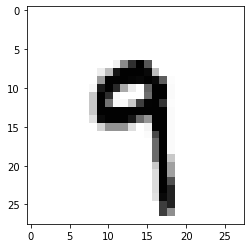

In [21]:
# Test the model using test sets
# no_grad 는 학습하지 않음
with torch.no_grad():
  X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

  #get on and predict
  r = random.randint(0, len(mnist_test)-1)
  X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction = linear(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
  plt.show()